## Random Forest and Desicion Tree

## For regression use

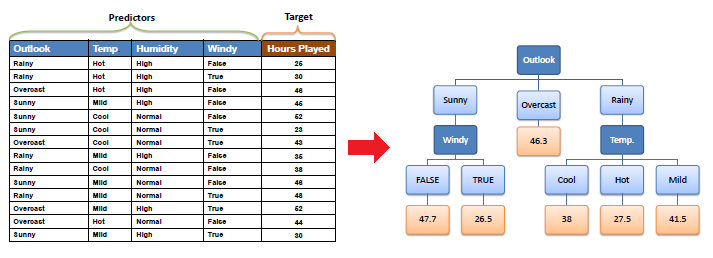

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [122]:
data = pd.read_excel(r'Concrete.xlsx')

In [123]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0000,0.0000,0.0000,162.0000,2.5000,1040.0000,676.0000,28,79.9861
1,540.0000,0.0000,0.0000,162.0000,2.5000,1055.0000,676.0000,28,61.8874
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270,40.2695
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365,41.0528
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360,44.2961
...,...,...,...,...,...,...,...,...,...
1025,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2844
1026,322.2000,0.0000,115.6000,196.0000,10.4000,817.9000,813.4000,28,31.1788
1027,148.5000,139.4000,108.6000,192.7000,6.1000,892.4000,780.0000,28,23.6966
1028,159.1000,186.7000,0.0000,175.6000,11.3000,989.6000,788.9000,28,32.7680


In [124]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.0000,1030.0000,1030.0000,1030.0000,1030.0000,1030.0000,1030.0000,1030.0000,1030.0000
mean,281.1656,73.8955,54.1871,181.5664,6.2031,972.9186,773.5789,45.6621,35.8178
std,104.5071,86.2791,63.9965,21.3556,5.9735,77.7538,80.1754,63.1699,16.7057
min,102.0000,0.0000,0.0000,121.7500,0.0000,801.0000,594.0000,1.0000,2.3318
25%,192.3750,0.0000,0.0000,164.9000,0.0000,932.0000,730.9500,7.0000,23.7071
50%,272.9000,22.0000,0.0000,185.0000,6.3500,968.0000,779.5100,28.0000,34.4428
75%,350.0000,142.9500,118.2700,192.0000,10.1600,1029.4000,824.0000,56.0000,46.1363
max,540.0000,359.4000,200.1000,247.0000,32.2000,1145.0000,992.6000,365.0000,82.5992


In [125]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [126]:
data.corr()['Concrete compressive strength(MPa, megapascals) ']

Cement (component 1)(kg in a m^3 mixture)                0.4978
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.1348
Fly Ash (component 3)(kg in a m^3 mixture)              -0.1058
Water  (component 4)(kg in a m^3 mixture)               -0.2896
Superplasticizer (component 5)(kg in a m^3 mixture)      0.3661
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.1649
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.1672
Age (day)                                                0.3289
Concrete compressive strength(MPa, megapascals)          1.0000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

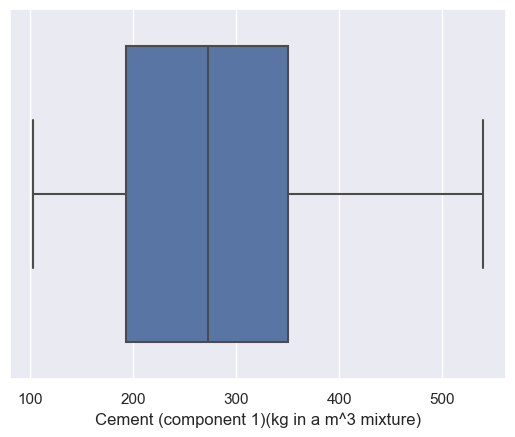

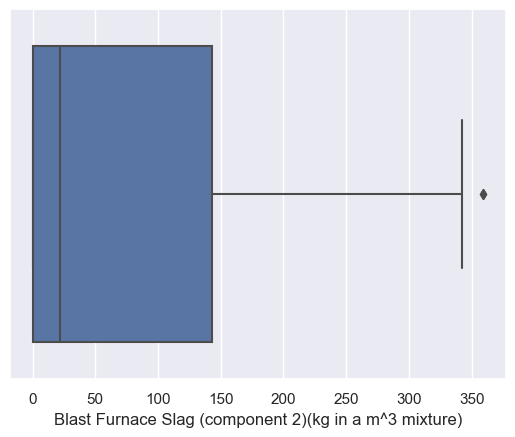

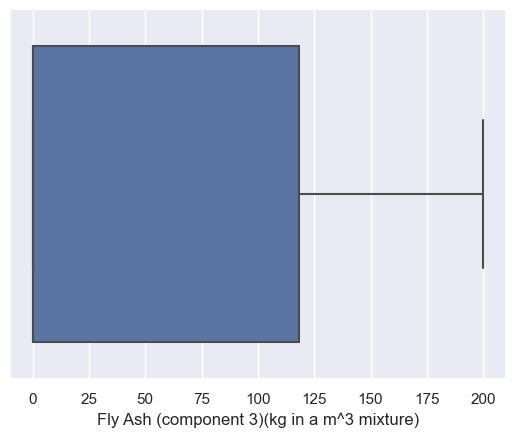

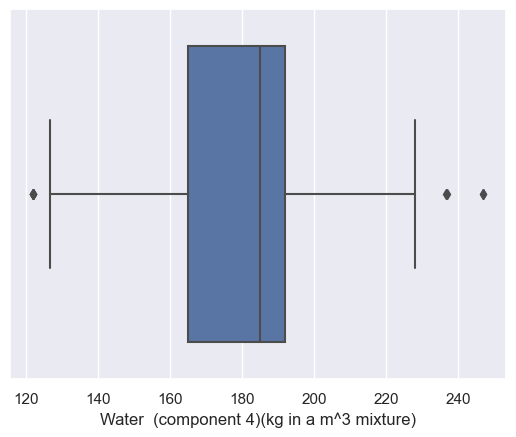

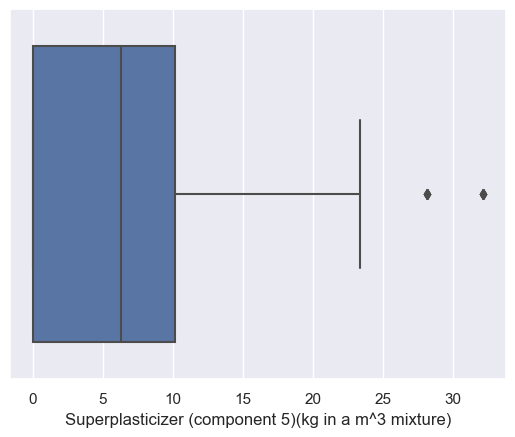

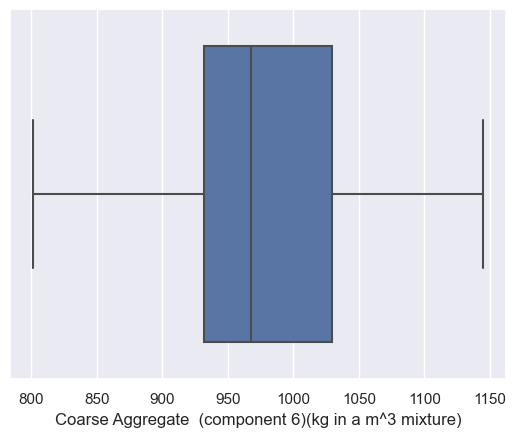

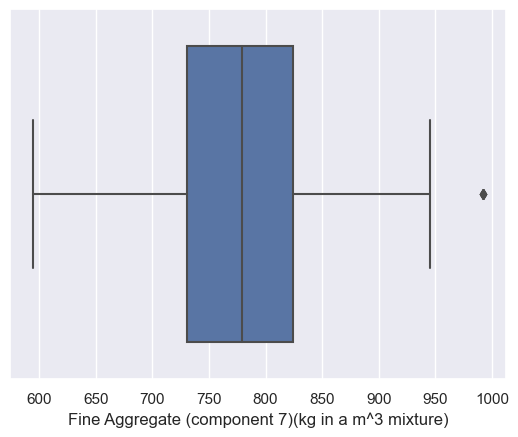

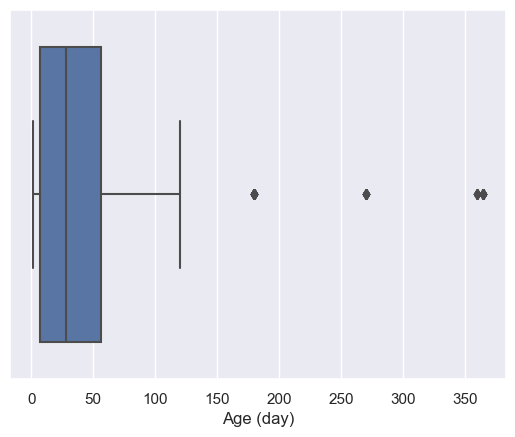

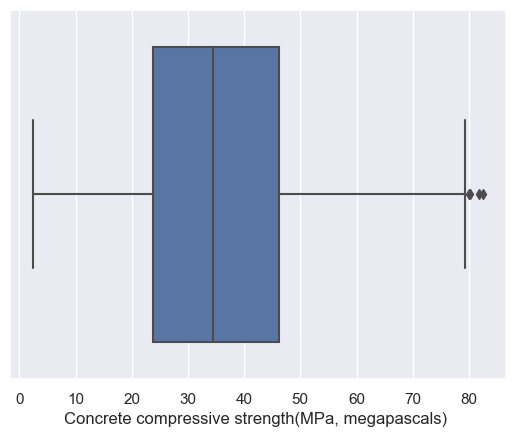

In [127]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [128]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

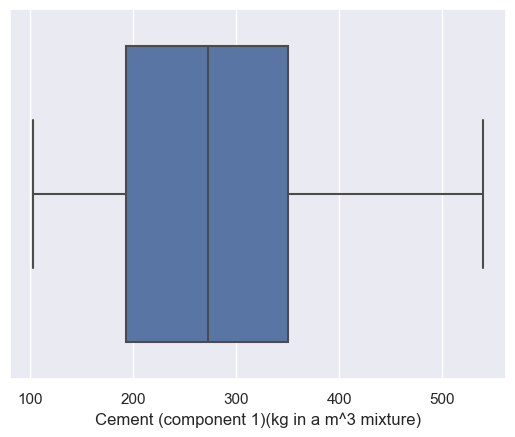

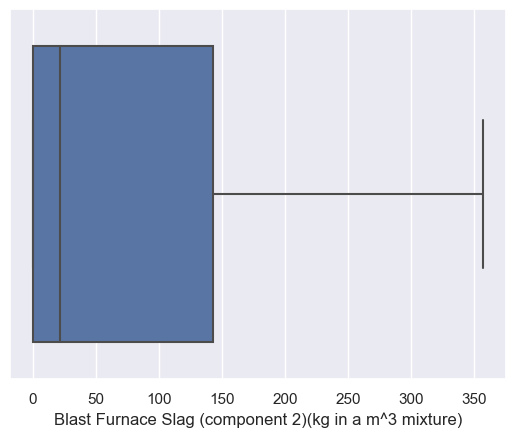

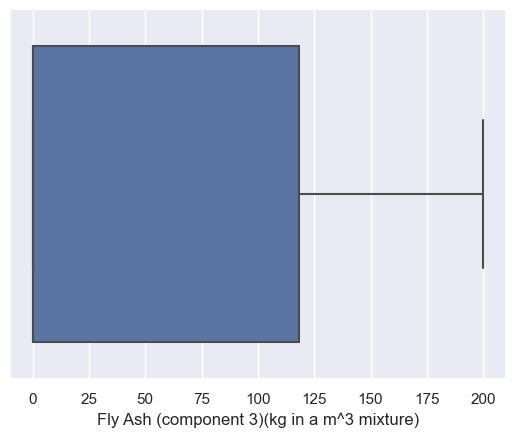

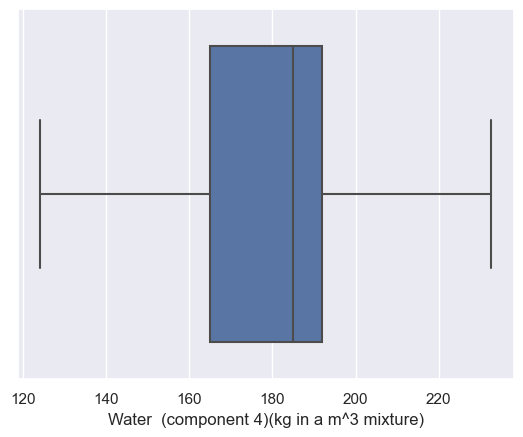

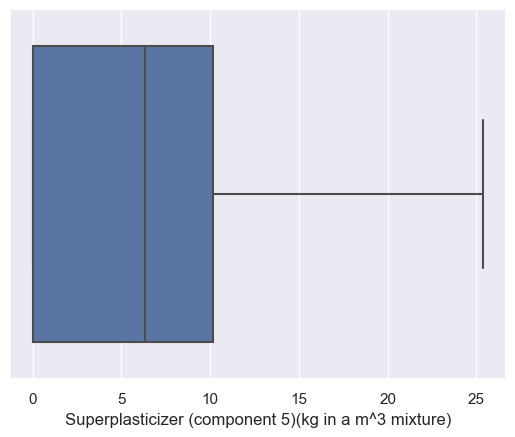

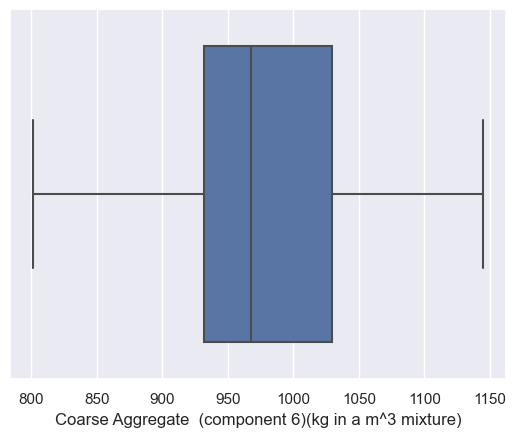

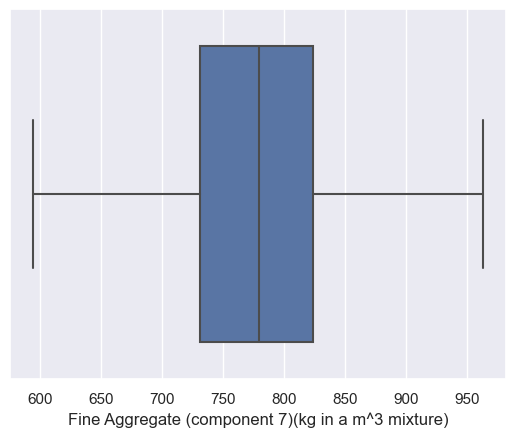

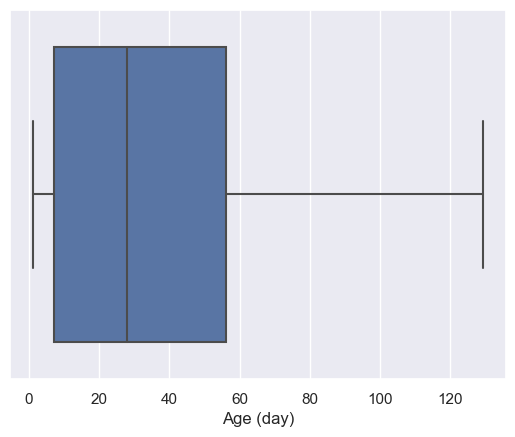

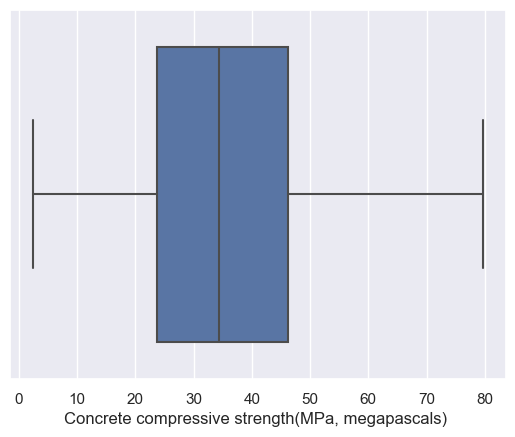

In [129]:
for i in data.columns:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [130]:
data.shape

(1030, 9)

In [131]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
#       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
#       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
#       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'
                 ]]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.1949,Cement (component 1)(kg in a m^3 mixture)
1,1.5159,Blast Furnace Slag (component 2)(kg in a m^3 m...
2,1.9186,Fly Ash (component 3)(kg in a m^3 mixture)
3,2.9425,Superplasticizer (component 5)(kg in a m^3 mix...


In [133]:
data = data[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
            'Concrete compressive strength(MPa, megapascals) ']]

data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
0,540.0000,0.0000,0.0000,2.5000,79.7800
1,540.0000,0.0000,0.0000,2.5000,61.8874
2,332.5000,142.5000,0.0000,0.0000,40.2695
3,332.5000,142.5000,0.0000,0.0000,41.0528
4,198.6000,132.4000,0.0000,0.0000,44.2961
...,...,...,...,...,...
1025,276.4000,116.0000,90.3000,8.9000,44.2844
1026,322.2000,0.0000,115.6000,10.4000,31.1788
1027,148.5000,139.4000,108.6000,6.1000,23.6966
1028,159.1000,186.7000,0.0000,11.3000,32.7680


In [134]:
X = data[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)']]
y = data['Concrete compressive strength(MPa, megapascals) ']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [136]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return r2

In [137]:
reg = DecisionTreeRegressor()

reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [138]:
result = evaluate(reg, X_test, y_test)

Model Performance
Accuracy is 28.59563493283942 %


In [139]:
regRF = RandomForestRegressor()

regRF.fit(X_train,y_train)

RandomForestRegressor()

In [140]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return r2

In [141]:
result = evaluate(regRF, X_test, y_test)

Model Performance
Accuracy is 31.054987322884596 %


## Temperature Data

In [233]:
data = pd.read_csv(r'temps.csv')
data.head(5)

# temp_2: max temperature 2 days prior
# temp_1: max temperature 1 day prior
# average: historical average max temperature

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6000,45,29
1,2016,1,2,Sat,44,45,45.7000,44,61
2,2016,1,3,Sun,45,44,45.8000,41,56
3,2016,1,4,Mon,44,41,45.9000,40,53
4,2016,1,5,Tues,41,40,46.0000,44,41


In [234]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0000,348.0000,348.0000,348.0000,348.0000,348.0000,348.0000,348.0000
mean,2016.0000,6.4770,15.5144,62.6523,62.7011,59.7606,62.5431,60.0345
std,0.0000,3.4984,8.7730,12.1654,12.1205,10.5273,11.7941,15.6262
min,2016.0000,1.0000,1.0000,35.0000,35.0000,45.1000,35.0000,28.0000
25%,2016.0000,3.0000,8.0000,54.0000,54.0000,49.9750,54.0000,47.7500
50%,2016.0000,6.0000,15.0000,62.5000,62.5000,58.2000,62.5000,60.0000
75%,2016.0000,10.0000,23.0000,71.0000,71.0000,69.0250,71.0000,71.0000
max,2016.0000,12.0000,31.0000,117.0000,117.0000,77.4000,92.0000,95.0000


In [235]:
data.corr()

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_73346/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,month,day,temp_2,temp_1,average,actual,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0000,-0.0004,0.0477,0.0327,0.1208,0.0045,0.0481
day,NaN,-0.0004,1.0000,-0.0462,-0.0007,-0.0211,-0.0217,0.0246
temp_2,NaN,0.0477,-0.0462,1.0000,0.8578,0.8216,0.8058,0.5838
temp_1,NaN,0.0327,-0.0007,0.8578,1.0000,0.8193,0.8779,0.5413
average,NaN,0.1208,-0.0211,0.8216,0.8193,1.0000,0.8484,0.6893
actual,NaN,0.0045,-0.0217,0.8058,0.8779,0.8484,1.0000,0.5691
friend,NaN,0.0481,0.0246,0.5838,0.5413,0.6893,0.5691,1.0000


In [236]:
data.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

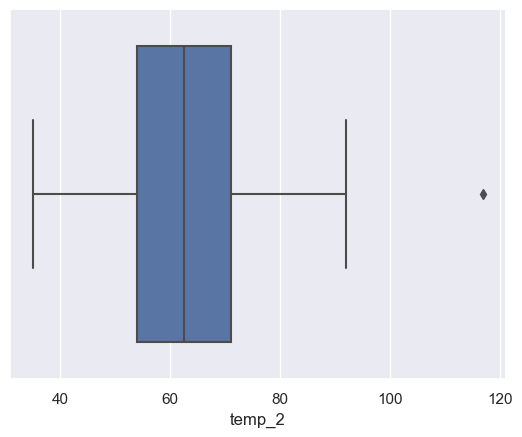

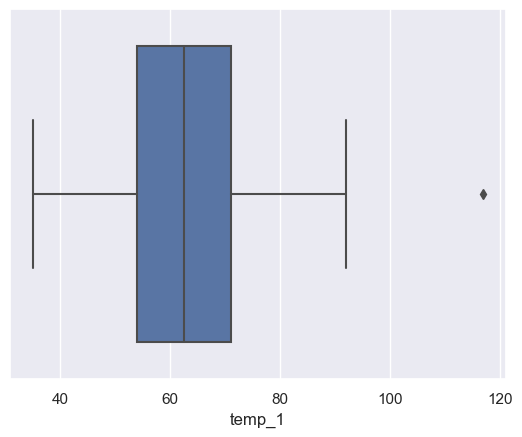

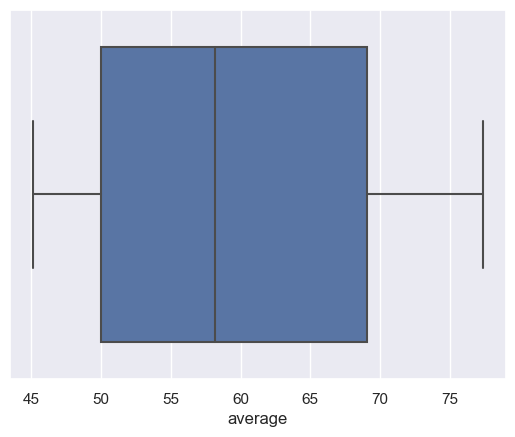

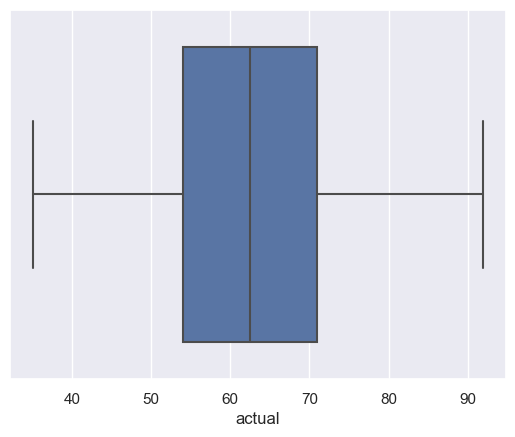

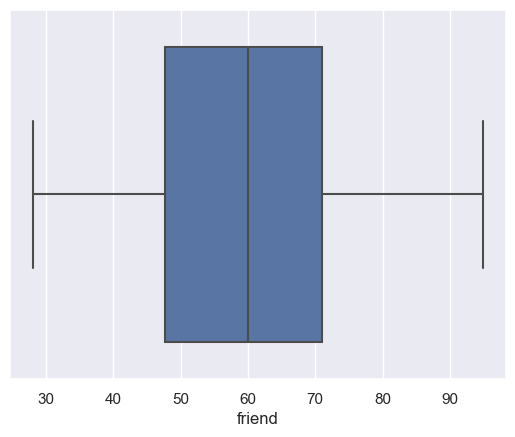

In [238]:
for i in data[['temp_2', 'temp_1', 'average', 'actual','friend']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [239]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower = Q1-1.5*IQR
Upper = Q3+1.5*IQR
#print(Lower, Upper)

year      2016.0000
month        3.0000
day          8.0000
temp_2      54.0000
temp_1      54.0000
average     49.9750
actual      54.0000
friend      47.7500
Name: 0.25, dtype: float64
year      2016.0000
month       10.0000
day         23.0000
temp_2      71.0000
temp_1      71.0000
average     69.0250
actual      71.0000
friend      71.0000
Name: 0.75, dtype: float64
year       0.0000
month      7.0000
day       15.0000
temp_2    17.0000
temp_1    17.0000
average   19.0500
actual    17.0000
friend    23.2500
dtype: float64


/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_73346/1556111807.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data.quantile(0.25)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_73346/1556111807.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data.quantile(0.75)


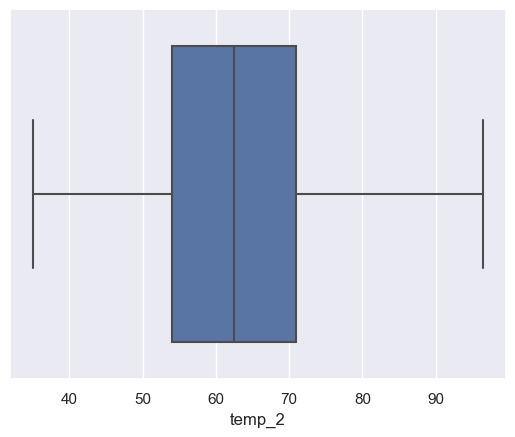

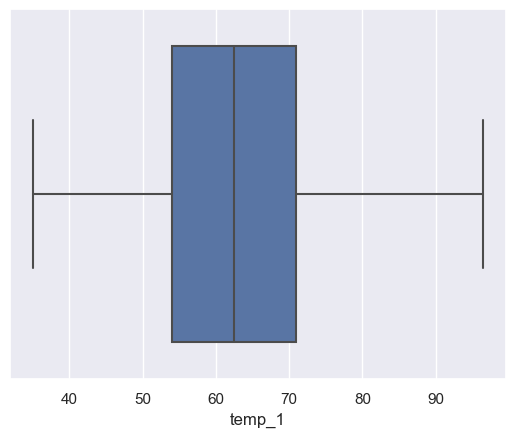

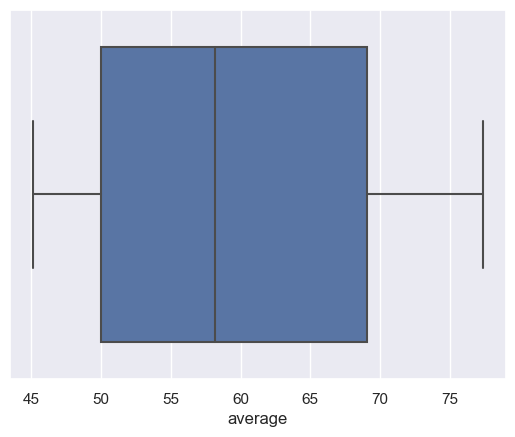

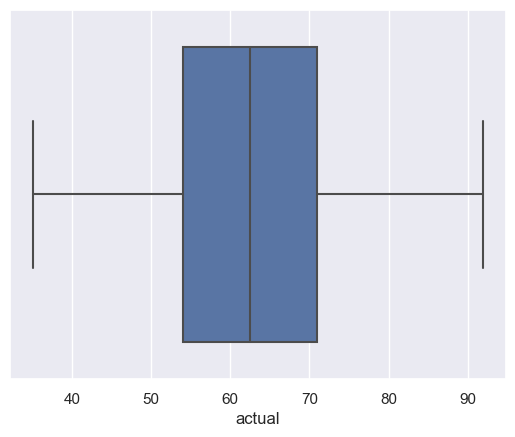

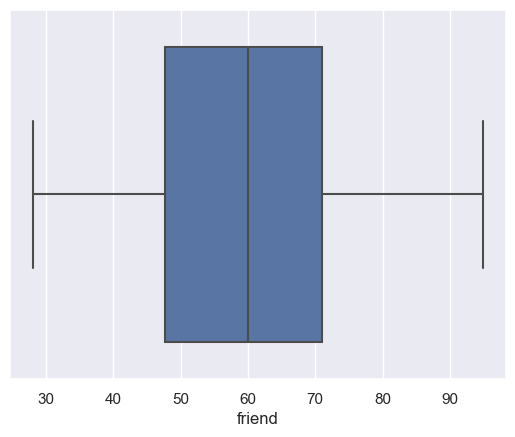

In [240]:
for i in data[['temp_2', 'temp_1', 'average', 'actual','friend']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [241]:
data = pd.get_dummies(data, drop_first=True)

data

,year,month,day,temp_2,temp_1,average,actual,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45.0000,45.0000,45.6000,45.0000,29.0000,0,0,0,0,0,0
1,2016,1,2,44.0000,45.0000,45.7000,44.0000,61.0000,0,1,0,0,0,0
2,2016,1,3,45.0000,44.0000,45.8000,41.0000,56.0000,0,0,1,0,0,0
3,2016,1,4,44.0000,41.0000,45.9000,40.0000,53.0000,1,0,0,0,0,0
4,2016,1,5,41.0000,40.0000,46.0000,44.0000,41.0000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42.0000,42.0000,45.2000,47.0000,47.0000,0,0,0,0,1,0
344,2016,12,28,42.0000,47.0000,45.3000,48.0000,58.0000,0,0,0,0,0,1
345,2016,12,29,47.0000,48.0000,45.3000,48.0000,65.0000,0,0,0,1,0,0
346,2016,12,30,48.0000,48.0000,45.4000,57.0000,42.0000,0,0,0,0,0,0


In [242]:
data.isnull().sum()

year          0
month         0
day           0
temp_2        0
temp_1        0
average       0
actual        0
friend        0
week_Mon      0
week_Sat      0
week_Sun      0
week_Thurs    0
week_Tues     0
week_Wed      0
dtype: int64

In [243]:
data.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'friend', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')

In [244]:
y = data['actual']
x = data.drop('actual', axis = 1)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [246]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = reg.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

# Default model

In [247]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [248]:
result = evaluate(reg, X_test, y_test)

  Metric   Train    Test
0    MAE  1.5125  3.8245
1    MSE  4.0121 24.8900
2   RMSE  2.0030  4.9890
3     R2 97.1028 82.1024


# Optimize model

In [279]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [280]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [281]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [282]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)


  Metric   Train    Test
0    MAE  1.5125  3.6457
1    MSE  4.0121 24.2781
2   RMSE  2.0030  4.9273
3     R2 97.1028 82.5424


In [283]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a regression model using the single variable on the training set
    optimized_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = optimized_model.predict(X_train_single_var)

    # Calculate R2 for the single variable model on the training set
    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    # Fit a regression model using the single variable on the test set
    y_pred_test_single_var = optimized_model.predict(X_test_single_var)

    # Calculate R2 for the single variable model on the test set
    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    # Append the results to the lists
    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a DataFrame from the results

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
4,temp_1,0.8626,0.8091
1,month,0.7663,0.7724
5,average,0.9206,0.6907
3,temp_2,0.7848,0.6468
6,friend,0.4766,0.1211
11,week_Tues,0.0011,-0.0006
0,year,-0.0000,-0.0028
10,week_Thurs,0.0002,-0.0034
8,week_Sat,0.0011,-0.0037
9,week_Sun,0.0016,-0.0082


# Use features without overfitting

In [284]:
data.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'friend', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')

In [285]:
x = data[['temp_1','month','average','temp_2']]
y = data['actual']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [287]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [288]:
result = evaluate(reg, X_test, y_test)

  Metric   Train    Test
0    MAE  1.5486  3.7962
1    MSE  4.2135 23.7565
2   RMSE  2.0527  4.8741
3     R2 96.9574 82.9174
